<a href="https://colab.research.google.com/github/Viraj-Rana008/Deep-Learning/blob/main/fastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
from fastbook import *
# setup_book()
from fastai.vision.widgets import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
def is_cat(x):
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

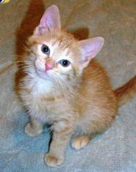

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(172)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
uploader = SimpleNamespace(data = ['/content/1_pFQZxtxjUj6KWw-rxomA6Q.png'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.016632


#Bear Classifier

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f786a751fbb548a48d8afa39350bf30d')

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

###Downloadig Images Way--I

In [ ]:
results = search_images_bing(key, 'teddy bear')
imgs = results.attrgot('contentUrl')

print(len(imgs))
print("URL: ", imgs[1])     # url-link to bear image

dest = 'images/grizzy.jpg'
download_url(imgs[10], dest)

img = Image.open(dest)
img.to_thumb(200, 200)

###Downloading Images Way-II

200
https://cdn.audleytravel.com/-/-/79/160033025091139069040022125202060038124167252088.jpg


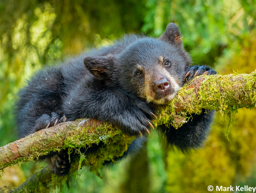

In [ ]:
urls = search_images_ddg('black bear', max_images=200)

print(len(urls))
print(urls[2])

dest = 'images/bear.jpg'
download_url(urls[159], dest)

img = Image.open(dest)
img.thumbnail((256,256))
img

In [ ]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [ ]:
if not path.exists():
  path.mkdir()
  for bear_type in bear_types:
    dest = (path/bear_type)
    dest.mkdir(exist_ok=True)

    ## Way-I
    # results = search_images_bing(key, f'{bear_type} bear')
    # download_images(dest, urls=results.attrgot('contentUrl'))

    ## Way-II
    results = search_images_ddg(f'{bear_type} bear')
    download_images(dest, urls=results)

In [ ]:
# Get path objects to all images
fns = get_image_files(path)
fns

(#573) [Path('bears/grizzly/00000052.jpg'),Path('bears/grizzly/00000115.jpg'),Path('bears/grizzly/00000108.jpg'),Path('bears/grizzly/00000131.jpg'),Path('bears/grizzly/00000195.jpg'),Path('bears/grizzly/00000194.jpg'),Path('bears/grizzly/00000158.jpg'),Path('bears/grizzly/00000189.jpg'),Path('bears/grizzly/00000064.jpg'),Path('bears/grizzly/00000039.jpg')...]

In [ ]:
# Check for images which can't be opened
failed = verify_images(fns)
failed

(#3) [Path('bears/grizzly/00000038.jpg'),Path('bears/grizzly/00000145.jpg'),Path('bears/black/00000133.jpg')]

In [ ]:
# Calls Path.unlink() function on all failed images (failed is a object)
failed.map(Path.unlink)

(#3) [None,None,None]

In [ ]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [ ]:
dls = bears.dataloaders(path)

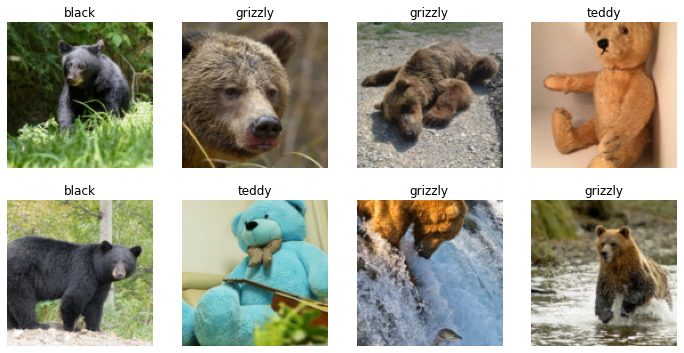

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

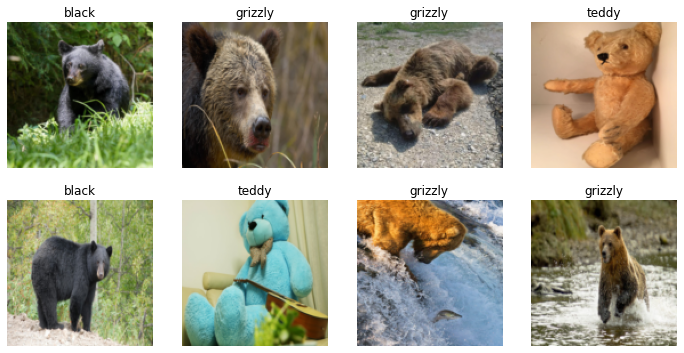

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

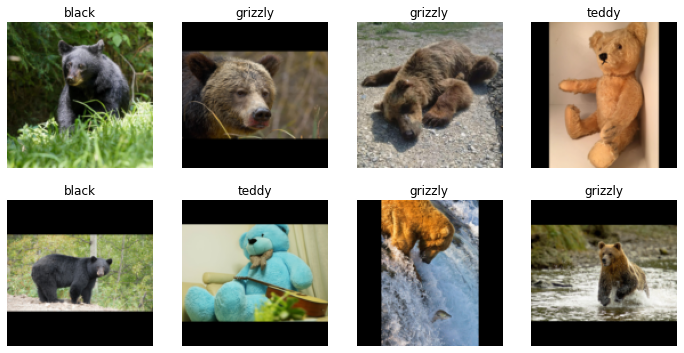

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

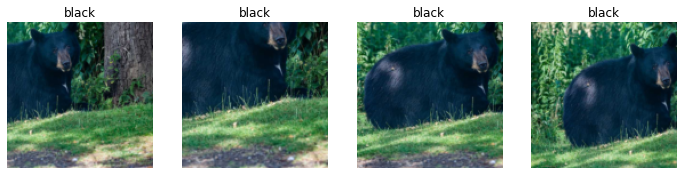

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

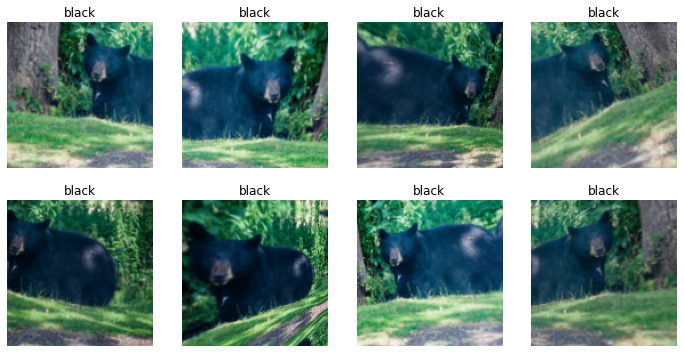

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
# Prepare Final Data (Train-Valid)
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                  batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

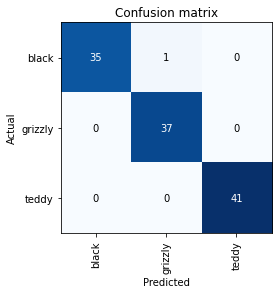

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

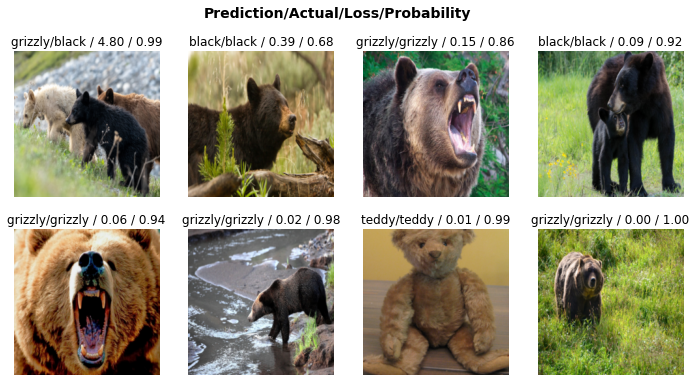

In [ ]:
interp.plot_top_losses(8, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images.jpg')

('teddy', TensorBase(2), TensorBase([3.0408e-06, 1.6524e-04, 9.9983e-01]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
disp = widgets.Output()
disp.clear_output()
with disp:
  display(img.to_thumb(128,128))
disp

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

In [ ]:
label_pred = widgets.Label()
label_pred.value = f'Prediction: {pred};  Probability: {probs[pred_idx]:.04f}'
label_pred

Label(value='Prediction: black;  Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  
  disp.clear_output()
  with disp:
    display(img.to_thumb(128, 128))
  
  pred, pred_idx, probs = learn_inf.predict(img)

  label_pred.value = f'Prediction: {pred};   Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your Bear-'), btn_upload, btn_run, disp, label_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

#MNIST

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [ ]:
Path.BASE_PATH = path

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
print(im3.shape)
im3

(28, 28)


In [ ]:
type(im3)

PIL.PngImagePlugin.PngImageFile

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-style':'6pt'}).background_gradient('Greys')

In [ ]:
seven_tensors = [tensor(Image.open(img)) for img in sevens]
three_tensors = [tensor(Image.open(img)) for img in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

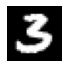

In [ ]:
# three_tensor is not a image...
# can't use Image to display...
# use fastai function to display/plot a tensor
show_image(three_tensors[20], cmap='gray')

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

## Baseline

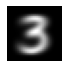

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3, cmap='gray')

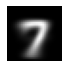

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7, cmap='gray')

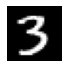

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3, cmap='gray')

In [ ]:
dist_3_abs = (mean3 - a_3).abs().mean()
dist_3_sqr = ((mean3 - a_3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (mean7 - a_3).abs().mean()
dist_7_sqr = ((mean7 - a_3)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
# in-built function by PyTorch
F.l1_loss(a_3, mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(img)) for img in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(img)) for img in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1, -2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1349, 0.1612, 0.1191,  ..., 0.1272, 0.1137, 0.1142]),
 torch.Size([1010]))

In [ ]:
def is_3(x):
  return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [ ]:
is_3(valid_3_tens), is_3(valid_3_tens).float()

(tensor([ True, False,  True,  ..., False,  True,  True]),
 tensor([1., 0., 1.,  ..., 0., 1., 1.]))

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

## Gradient Descent usig PyTorch

In [ ]:
def f(x):
  return x**2

In [ ]:
xt = tensor(3.).requires_grad_()

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + b*t + c

In [ ]:
def mse(preds, target):
  return ((preds - target)**2).mean()

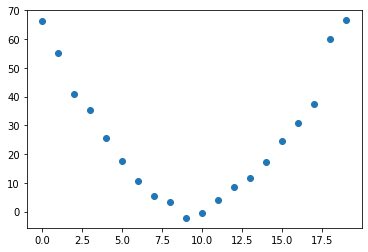

In [ ]:
# Need to predict these
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

### 7 Step Process of Gradient Descent

In [ ]:
# Step-I : Initialize
params = torch.randn(3).requires_grad_()
params

tensor([ 0.9669,  0.9752, -1.0133], requires_grad=True)

In [ ]:
# Step-II : Calculate Prediction
preds = f(time, params)
preds

tensor([ -1.0133,   0.9287,   4.8045,  10.6140,  18.3572,  28.0341,  39.6447,  53.1890,  68.6671,  86.0788, 105.4243, 126.7034, 149.9163, 175.0629, 202.1432, 231.1572, 262.1049, 294.9864, 329.8015,
        366.5504], grad_fn=<AddBackward0>)

In [ ]:
# Step-III : Calculate Loss
loss = mse(preds, speed)
loss

tensor(22854.9648, grad_fn=<MeanBackward0>)

In [ ]:
# Step-IV : Calculate Gradient
loss.backward()
params.grad

tensor([49986.8242,  3219.7263,   203.4375])

In [ ]:
# Step-V : Update Weight
lr = 1e-5
params.data -= params.grad.data * lr
params.grad = None

In [ ]:
# checking loss of updated weights
preds = f(time, params)
mse(preds, speed)

tensor(729.6305, grad_fn=<MeanBackward0>)

In [ ]:
def apply_steps(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  if prn:
    print(loss.item())
  return preds

In [ ]:
# Step-VI : Repeat II-V
for i in range(10):
  apply_steps(params)

12939.8134765625
2963.48046875
1075.6473388671875
718.4063720703125
650.800048828125
638.0013427734375
635.5739135742188
635.1090698242188
635.015625
634.9924926757812


In [ ]:
# Step-VII : Stop
# We chose to stop after 10 epochs

##MNIST via Gradient Descent

### MNIST Loss Function

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_dset = list(zip(valid_x, valid_y))

In [ ]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28, 1))

In [ ]:
bias = init_params(1)

In [ ]:
(train_x * weights.T).sum() + bias

tensor([-105623.5156], grad_fn=<AddBackward0>)

In [ ]:
def linear1(x):
  return x@weights + bias

pred = linear1(train_x)
pred

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (pred>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [ ]:
corrects.float().mean().item()

0.5379961133003235

In [ ]:
with torch.no_grad():
  weights[0] *= 1.01
pred = linear1(train_x)
((pred>0.0).float()==train_y).float().mean().item()

0.5379961133003235

In [ ]:
def mnist_loss(pred, target):
  return torch.where(target==1, 1-pred, pred).mean()

In [ ]:
tar = tensor([1,0,1])
prd = tensor([0.8,0.2,0.9])

mnist_loss(prd, tar)

tensor(0.1667)

In [ ]:
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

In [ ]:
def mnist_loss(predictions, targets):
  predictions = sigmoid(predictions)
  return torch.where(targets==1, 1-predictions, predictions).mean()

### Mini-Batch

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
dl  # it is a iterator
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([19, 14,  0, 24, 20, 12]), ('t', 'o', 'a', 'y', 'u', 'm')),
 (tensor([23,  8,  9,  3, 16,  6]), ('x', 'i', 'j', 'd', 'q', 'g')),
 (tensor([ 4,  7,  1, 13,  2, 22]), ('e', 'h', 'b', 'n', 'c', 'w')),
 (tensor([ 5, 17, 18, 10, 11, 15]), ('f', 'r', 's', 'k', 'l', 'p')),
 (tensor([25, 21]), ('z', 'v'))]

### All Together

In [ ]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
x,y = first(dl)           # return the first batch
x.shape, y.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([[11.6180],
        [ 9.0489],
        [-2.4524],
        [-2.5197]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.4616, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0057), tensor([-0.0355]))

In [ ]:
def calc_grad(x, y, model):
  preds = model(x)
  loss = mnist_loss(preds, y)
  loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-1.0046e-08), tensor([-6.8763e-08]))

In [ ]:
def train_epoch(model, lr, params):
  for x,y in dl:
    calc_grad(x, y, model)
    for p in params:
      p.data -= p.grad * lr
      p.grad.zero_()

In [ ]:
def batch_accuracy(pred, tar):
  pred = sigmoid(pred)
  correct = (pred>0.5) == tar
  return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [ ]:
def validate_epoch(model):
  accuracy = [batch_accuracy(model(x), y) for x,y in valid_dl]
  return round(torch.stack(accuracy).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.5515

In [ ]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.642

In [ ]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=" ")

0.8182 0.914 0.9437 0.9565 0.9638 0.9677 0.9692 0.9706 0.9721 0.9736 0.975 0.975 0.976 0.976 0.9765 0.977 0.9775 0.9775 0.9775 0.9775 

### Optimizer with PyTorch

In [ ]:
linear_model = nn.Linear(28*28, 1)

w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self, params, lr):
    self.params = list(params)
    self.lr = lr
  
  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
  for x,y in dl:
    calc_grad(x, y, model)
    opt.step()
    opt.zero_grad()

In [ ]:
def train_model(model, epochs):
  for _ in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=" ")

In [ ]:
train_model(linear_model, 20)

0.6093 0.6113 0.6137 0.6142 0.6152 0.6166 0.6196 0.6221 0.6245 0.6255 0.6294 0.6304 0.6319 0.6338 0.6363 0.6397 0.6412 0.6461 0.6485 0.65 

In [ ]:
# Replace BasicOptim class with PyTorch's SGD class
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.573 0.5745 0.575 0.5764 0.5769 0.5784 0.5799 0.5813 0.5823 0.5828 0.5843 0.5858 0.5872 0.5892 0.5897 0.5911 0.5936 0.596 0.5975 0.5985 

In [ ]:
# PyTorch DataLoader class 
dls = DataLoaders(dl, valid_dl)

In [ ]:
# Replace train_model with PyTorch Learner class
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

### Adding Non-Linearity

In [ ]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

In [ ]:
def simple_net(x):
  res = x@w1 + b1
  res = res.max(tensor(0.0))      # ReLu
  res = res@w2 + b2
  return res

In [ ]:
# Creating sequential-function/Layers using PyTorch 
simple_net = nn.Sequential(nn.Linear(28*28, 30), nn.ReLU(), nn.Linear(30, 1))

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

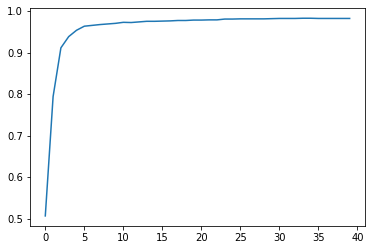

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [ ]:
learn.recorder.values[-1][2]      # Accuracy at end

0.983316957950592

In [ ]:
m = learn.model
m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
w,b = m[0].parameters()

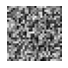

In [ ]:
show_image(w[28].view(28,28), cmap='gray')

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


#PET Classification

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [ ]:
(path/'images').ls()

(#7393) [Path('images/Egyptian_Mau_157.jpg'),Path('images/Ragdoll_147.jpg'),Path('images/pomeranian_167.jpg'),Path('images/miniature_pinscher_2.jpg'),Path('images/Ragdoll_252.jpg'),Path('images/Bengal_194.jpg'),Path('images/Birman_168.jpg'),Path('images/Abyssinian_47.jpg'),Path('images/shiba_inu_206.jpg'),Path('images/wheaten_terrier_167.jpg')...]

In [ ]:
fname = (path/'images').ls()[0]
print(fname.name)
re.findall(r'(.+)_\d+.jpg$', fname.name)

Siamese_119.jpg


['Siamese']

In [ ]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = pets.dataloaders(path/'images')

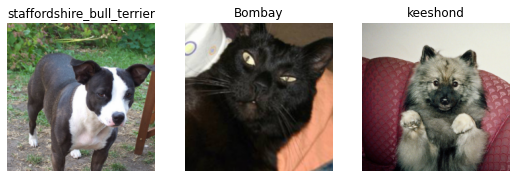

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

###Activations and Labels

In [ ]:
x,y = dls.one_batch()

In [ ]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
y

TensorCategory([10, 24, 32,  4,  2, 18, 15, 15, 25, 35,  4, 15, 25,  8, 19, 26, 12, 32, 36, 25,  0, 10, 30,  1, 22, 25,  3, 14, 21, 31, 21, 22, 10, 11, 29, 33, 12, 19, 21,  4,  8, 21, 27,  7,  2, 23,  1,  4,
         0, 34, 30,  0,  6,  9, 25, 30, 21, 11, 33, 18, 30,  9, 30,  8], device='cuda:0')

In [ ]:
dls.vocab[10]

'Siamese'

In [ ]:
preds, _ = learn.get_preds(dl=[(x,y)])
print(len(preds), len(preds[0]))
preds[0]

64 37


TensorBase([1.2829e-04, 3.3441e-05, 4.5083e-01, 8.8853e-05, 7.8717e-05, 2.2162e-05, 7.6658e-05, 8.0597e-06, 2.8639e-01, 1.5108e-03, 2.5931e-01, 3.3661e-05, 3.9349e-05, 4.9644e-06, 6.2002e-06, 5.7914e-06,
        7.0629e-06, 3.9953e-05, 4.5980e-05, 1.7394e-05, 6.5050e-06, 2.1292e-05, 1.4737e-05, 3.3947e-05, 3.2409e-04, 5.2626e-04, 4.6955e-05, 3.4927e-06, 8.9922e-06, 4.5783e-05, 8.4732e-05, 1.2555e-05,
        1.4294e-05, 3.6519e-05, 4.4192e-05, 9.3412e-05, 7.2402e-06])

## Cross-Entropy Loss

In [ ]:
activ = torch.randn((6,2))*2
activ

tensor([[-2.2200, -4.8854],
        [ 2.0041,  2.4689],
        [ 0.7514, -0.2709],
        [-1.7835,  0.3873],
        [ 0.3650,  0.4790],
        [-1.2146, -0.5684]])

In [ ]:
activ.sigmoid()       # act[i][0] & act[i][1] dont sum to 1

tensor([[0.0980, 0.0075],
        [0.8812, 0.9219],
        [0.6795, 0.4327],
        [0.1439, 0.5956],
        [0.5903, 0.6175],
        [0.2289, 0.3616]])

In [ ]:
(activ[:,0] - activ[:,1]).sigmoid()       # classify using threshold on these results

tensor([0.9349, 0.3858, 0.7354, 0.1024, 0.4715, 0.3439])

In [ ]:
# for multi-class cant do this sigmoid subtraction thing
# Use softmax
sm_act = torch.softmax(activ, dim=1)
sm_act

tensor([[0.9349, 0.0651],
        [0.3858, 0.6142],
        [0.7354, 0.2646],
        [0.1024, 0.8976],
        [0.4715, 0.5285],
        [0.3439, 0.6561]])

In [ ]:
targs = tensor([0,1,0,1,1,0])
idx = range(len(targs))
result = -sm_act[idx, targs]           # take -ve cause "log"-ing it later returns -ve num
result

tensor([-0.9349, -0.6142, -0.7354, -0.8976, -0.5285, -0.3439])

In [ ]:
# PyTorch function for calculating -sm_act[]
result = F.nll_loss(sm_act, targs, reduction="none")           # nll_loss doesn't apply "log" thats why -ve nums
result

tensor([-0.9349, -0.6142, -0.7354, -0.8976, -0.5285, -0.3439])

In [ ]:
## Loss : small prob in predicting 1 ---> more error    (for binary loss)
-torch.log(-result)           # -result: as log take +ve values;  -torch.log: as log return -ve values

tensor([0.0673, 0.4875, 0.3073, 0.1080, 0.6378, 1.0675])

In [ ]:
(-torch.log(-result)).mean()          # mean loss

tensor(0.4459)

In [ ]:
# PyTorch comes to rescue
loss_func = nn.CrossEntropyLoss()
loss_func(activ, targs)

tensor(0.4459)

In [ ]:
nn.CrossEntropyLoss(reduction="none")(activ, targs)                   # same as individual losses

tensor([0.0673, 0.4875, 0.3073, 0.1080, 0.6378, 1.0675])

In [ ]:
# Or use function in F namespace
F.cross_entropy(activ, targs)

tensor(0.4459)

## Interpretation

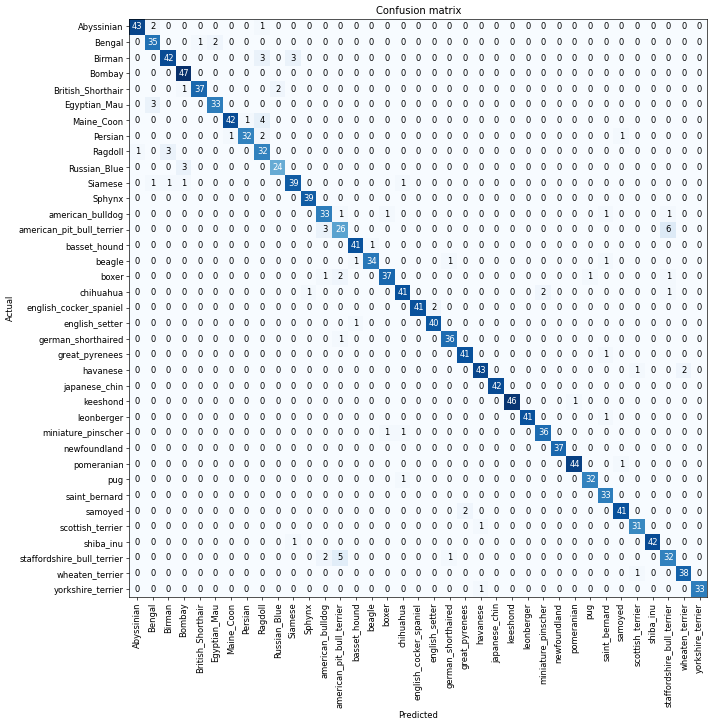

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)         # pairs with minimum confusion count=5

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

## Learning Rate Finder

In [ ]:
learn.predict('/content/english-cocker-spaniel-dogs-puppies-1.webp')[0]

'english_cocker_spaniel'

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

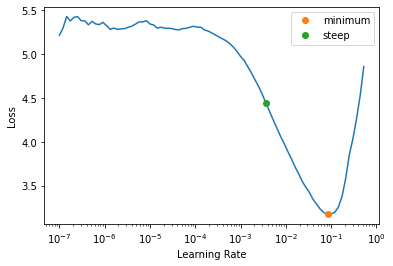

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
print(f'Minimum/10:\t{lr_min:.2e}\nSteepest Point:\t{lr_steep:.2e}')

Minimum/10:	8.32e-03
Steepest Point:	3.63e-03


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=2e-3)